## Merge CT shapefile & ACS files

In [1]:
# I imported more than I used...in case we need at some point~
import os
import zipfile
import urllib2
import urllib
import json
from cStringIO import StringIO

import pandas as pd
import numpy as np

import geopandas as gpd
from geopandas import GeoDataFrame
import pysal as ps
from fiona.crs import from_epsg
import shapely
from shapely.geometry import Point, Polygon

import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


#### Foodstamp: S2201   aff_download
**income**: S1901 <br/>
**Language_Home**: S1601  Language_Spoken_At_Home_ACS <br/>
**race**: B02001  Race_ACS <br/>
**Age_and_Sex**: S0101 Age_and_Sex_ACS <br/>
**Employment_Status_ACS**: S2301 Employment_Status_ACS <br/>
**Financial**: S2503 Financial_Characteristics_ACS <br/>

## 1. CT Shapefile
### Geo ID Composition & Coordinate System

In [2]:
## ct state 2010 shape
# This is the orignal ct file where I stored it on my laptop~ I can upload to github too if needed.
path_ct2010 = "Datasets/ct_nyc_shape"
ct_nyc_shape = gpd.read_file(path_ct2010)
ct_nyc_shape.head(3)

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,Id,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
0,5000900,5,Staten Island,I,000900,9,1400000US36085000900,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,POLYGON ((-74.07920577013245 40.64343078374566...
1,5007400,5,Staten Island,I,007400,74,1400000US36085007400,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,5.788238e+06,9902.948473,POLYGON ((-74.05974734759452 40.59384861156719...
2,1009800,1,Manhattan,I,009800,98,1400000US36061009800,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478758 40.75638153099089...


In [3]:
ct_nyc_shape.to_csv("nyc_shape.csv")

In [25]:
SNAP = pd.read_csv("Datasets/SNAP/ACS_09-14.csv", low_memory=False)

In [26]:
SNAP = SNAP.rename(columns={'id': 'Id'})
SNAP_ct = ct_nyc_shape.merge(SNAP, on = "Id", how = "inner")

In [27]:
SNAP_ct.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,Id,NTACode,NTAName,PUMA,...,HC02_MOE_VC32,HC03_EST_VC32,HC03_MOE_VC32,HC01_EST_VC35,HC01_MOE_VC35,HC02_EST_VC35,HC02_MOE_VC35,HC03_EST_VC35,HC03_MOE_VC35,Year
0,5000900,5,Staten Island,I,000900,9,1400000US36085000900,SI22,West New Brighton-New Brighton-St. George,3903,...,23.9,52.3,14.4,4.8,(X),(X),(X),(X),(X),2014
1,5000900,5,Staten Island,I,000900,9,1400000US36085000900,SI22,West New Brighton-New Brighton-St. George,3903,...,31.7,58.5,17.1,9.0,(X),(X),(X),(X),(X),2009
2,5000900,5,Staten Island,I,000900,9,1400000US36085000900,SI22,West New Brighton-New Brighton-St. George,3903,...,30.7,64.3,13.2,1.9,(X),(X),(X),(X),(X),2011
3,5000900,5,Staten Island,I,000900,9,1400000US36085000900,SI22,West New Brighton-New Brighton-St. George,3903,...,30.7,62.6,21.3,5.3,(X),(X),(X),(X),(X),2010
4,5000900,5,Staten Island,I,000900,9,1400000US36085000900,SI22,West New Brighton-New Brighton-St. George,3903,...,34.5,57.3,16.9,2.0,(X),(X),(X),(X),(X),2013


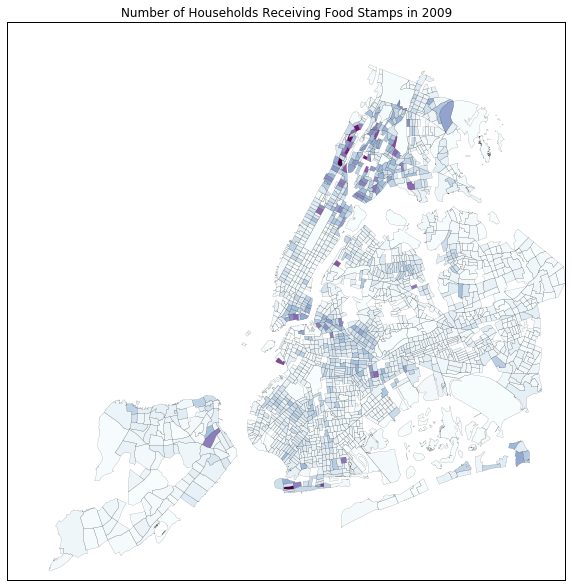

In [34]:
#HC02_EST_VC01: Households receiving food stamps

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
SNAP_ct_2009 = SNAP_ct.loc[SNAP_ct["Year"] == 2009]
SNAP_ct_2009.plot(column='HC02_EST_VC01',cmap='BuPu',alpha=1,linewidth=0.1,ax=ax)
plt.title("Number of Households Receiving Food Stamps in 2009")

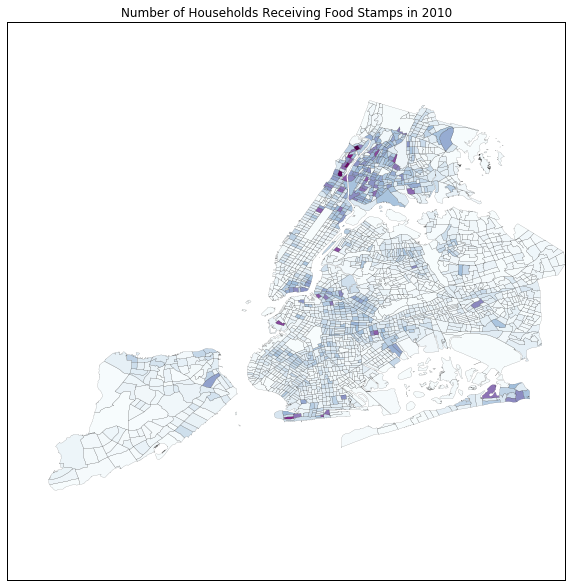

In [35]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
SNAP_ct_2010 = SNAP_ct.loc[SNAP_ct["Year"] == 2010]
SNAP_ct_2010.plot(column='HC02_EST_VC01',cmap='BuPu',alpha=1,linewidth=0.1,ax=ax)
plt.title("Number of Households Receiving Food Stamps in 2010")

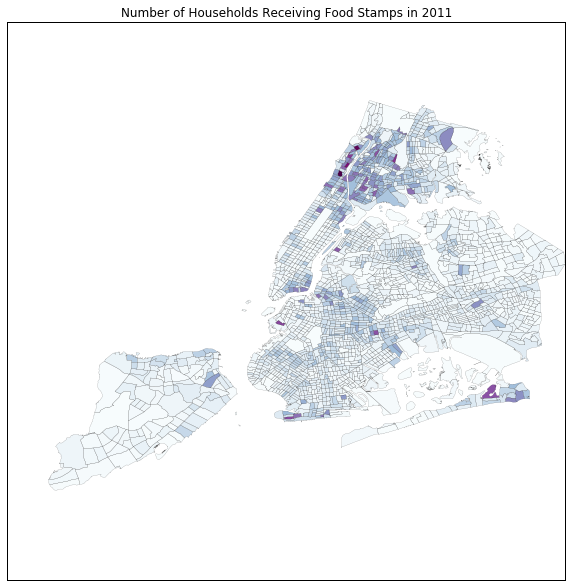

In [36]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
SNAP_ct_2011 = SNAP_ct.loc[SNAP_ct["Year"] == 2011]
SNAP_ct_2011.plot(column='HC02_EST_VC01',cmap='BuPu',alpha=1,linewidth=0.1,ax=ax)
plt.title("Number of Households Receiving Food Stamps in 2011")

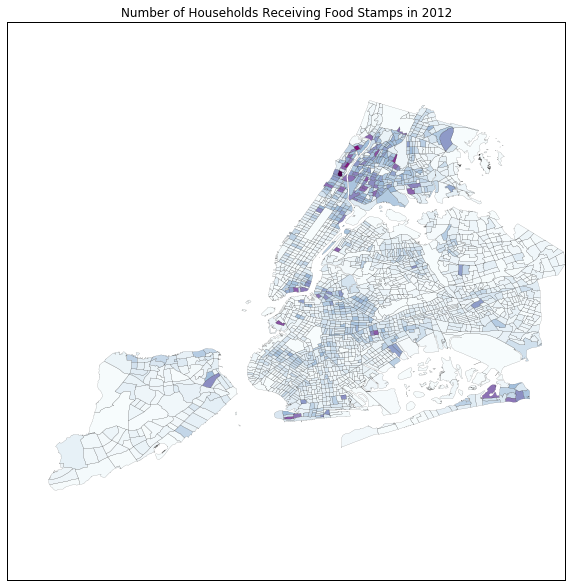

In [37]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
SNAP_ct_2012 = SNAP_ct.loc[SNAP_ct["Year"] == 2012]
SNAP_ct_2012.plot(column='HC02_EST_VC01',cmap='BuPu',alpha=1,linewidth=0.1,ax=ax)
plt.title("Number of Households Receiving Food Stamps in 2012")

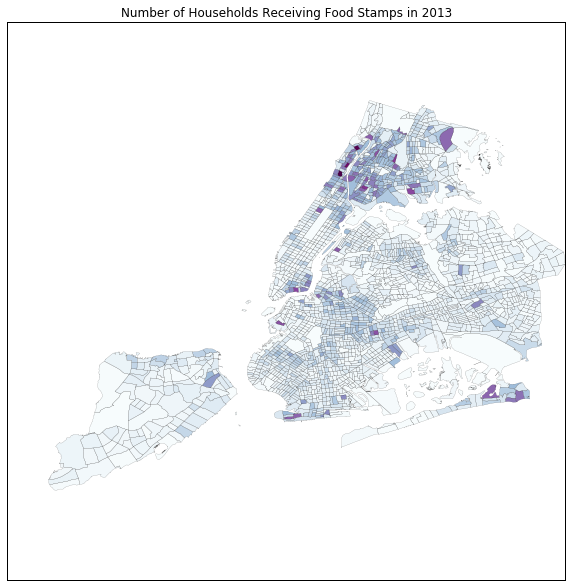

In [38]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
SNAP_ct_2013 = SNAP_ct.loc[SNAP_ct["Year"] == 2013]
SNAP_ct_2013.plot(column='HC02_EST_VC01',cmap='BuPu',alpha=1,linewidth=0.1,ax=ax)
plt.title("Number of Households Receiving Food Stamps in 2013")

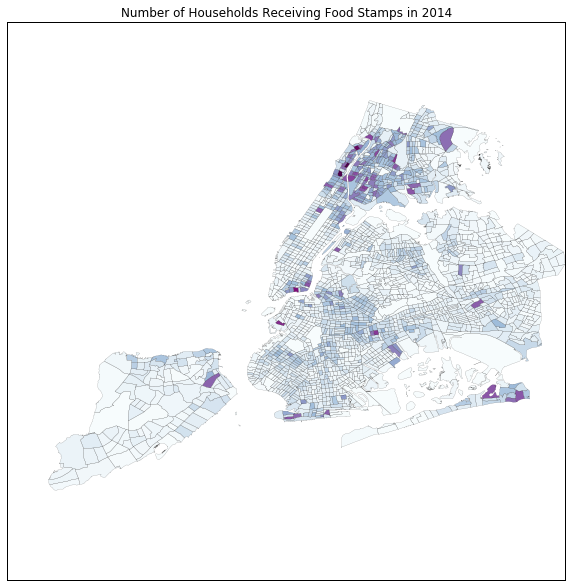

In [39]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
SNAP_ct_2014 = SNAP_ct.loc[SNAP_ct["Year"] == 2014]
SNAP_ct_2014.plot(column='HC02_EST_VC01',cmap='BuPu',alpha=1,linewidth=0.1,ax=ax)
plt.title("Number of Households Receiving Food Stamps in 2014")

#### Geo_id composition:
National ID: **14000000US**  <br/>
NY State ID: **36** <br/>
County ID: census tract number

In [8]:
countyID = {'Bronx':'005',
           'Manhattan':'061',
           'Staten Island':'085',
           'Brooklyn':'047',
           'Queens':'081'}

In [9]:
# Create geo_id by combining the National ID, NY State ID, County ID and the Census Tract Number
ct_nyc_shape['allcodes'] = list(zip(ct_nyc_shape.BoroName, ct_nyc_shape.CT2010))
ct_nyc_shape['Id']  = ct_nyc_shape[['allcodes']].applymap(lambda x: 
                            ("1400000US36%03d%06d"%(int(countyID[x[0]]),int(x[1]))))

In [10]:
ct_nyc_shape.head(3)

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,Id,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,allcodes
0,5000900,5,Staten Island,I,000900,9,1400000US36085000900,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,POLYGON ((-74.07920577013245 40.64343078374566...,"(Staten Island, 000900)"
1,5007400,5,Staten Island,I,007400,74,1400000US36085007400,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,5.788238e+06,9902.948473,POLYGON ((-74.05974734759452 40.59384861156719...,"(Staten Island, 007400)"
2,1009800,1,Manhattan,I,009800,98,1400000US36061009800,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478758 40.75638153099089...,"(Manhattan, 009800)"


In [11]:
ct_nyc_shape.crs = from_epsg(2263) # epsg=4326: lat/on | epsg=2263 is US feet
ct_nyc_shape = ct_nyc_shape.to_crs(epsg=4326)
ct_nyc_shape.head(3)

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,Id,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,allcodes
0,5000900,5,Staten Island,I,000900,9,1400000US36085000900,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,POLYGON ((-77.51985482365644 40.11248859879213...,"(Staten Island, 000900)"
1,5007400,5,Staten Island,I,007400,74,1400000US36085007400,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,5.788238e+06,9902.948473,POLYGON ((-77.51985474702921 40.11248846495294...,"(Staten Island, 007400)"
2,1009800,1,Manhattan,I,009800,98,1400000US36061009800,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-77.51985442951765 40.11248892123957...,"(Manhattan, 009800)"


In [12]:
ct_nyc_shape = ct_nyc_shape.copy()
ct_nyc_shape.drop(['allcodes'], axis=1, inplace=True)

# Save Data
ct_nyc_shape.to_file('ct_nyc_shape')

## 2. Framework- Merge Shapefile and ACS Files

In [13]:
## The ACS files have the following naming convension. We can read different files by picking different keys.

# catogory: (d, filename)
cat_id = {'foodstamp': ('S2201', 'aff_download'),
          'inc': ('S1601', 'Income_ACS'), 
         'lanhome':('S1901', 'Language_Spoken_At_Home_ACS'), 
          'race': ('B02001', 'Race_ACS'),
          'age_sex': ('S0101', 'Age_and_Sex_ACS'),
          'employ': ('S2301', 'Employment_Status_ACS'),
          'finan': ('S2503', 'Financial_Characteristics_ACS')}

In [14]:
# append ACS data to the CT shape file

def merge_ACS_ct(path_shp, path_ACS, ACS_cat, col, col_new, year):
    """
    the function merge a shape file with picked columns in ACS files on geoid
      path_shp: path of the shape file
      path_ACS: partial path of the target ACS files
      ACS_cat: ACS categories picked from the dictionary cat_id
      col: names of the columns we want to select from a ACS table
      col_new: rename selected columns
      year: years of the ACS files
    return merged shapefile
    """
    
    # link to ct shape file
    ### We can change this link to a "imtermediate ACS-ct shapefile"    
    ct_shape = GeoDataFrame.from_file(path_shp)
    ct_shape = ct_shape.copy()
    
    # catogory: (d, filename) --- 
    ## we are not using the folder name at this time~  in case we do, I leave it in here for now
    cat_id = {'foodstamp': ('S2201', 'aff_download'),
              'inc': ('S1601', 'Income_ACS'), 
             'lanhome':('S1901', 'Language_Spoken_At_Home_ACS'), 
              'race': ('B02001', 'Race_ACS'),
              'age_sex': ('S0101', 'Age_and_Sex_ACS'),
              'employ': ('S2301', 'Employment_Status_ACS'),
              'finan': ('S2503', 'Financial_Characteristics_ACS')}

    ACS_shape = ct_shape.copy()
    
    for yr in year:
        ACS = pd.read_csv(path_ACS + 'ACS_' + yr + '_5YR_'+ cat_id[ACS_cat][0] +'_with_ann.csv', skiprows=1).copy()
        ACS_pick = ACS.loc[:, col]   

        ACS_pick = ACS_pick.rename(columns={ col[0]: col_new[0] + yr,
                                       col[1]: col_new[1] + yr})

        #merge
        ACS_shape = ACS_shape.merge(ACS_pick, how='inner', on='Id' )
    
    return ACS_shape

In [15]:
### Take SNAP as an example here

path_ct = 'Datasets/ct_nyc_shape'
path_ACS = 'https://raw.githubusercontent.com/connorchency/USI_SNAP_Project/master/Datasets/SNAP/'

ACS_category = 'foodstamp'
col = ['Total; Estimate; Households', # 1
       'Households receiving food stamps; Estimate; Households', # 2
       'Id']
        #'Households receiving food stamps/SNAP; Estimate; Households'   # for year 2015

col_new = ['HH_total', 'HH_foodstp']
year = ['09', '10', '11', '12', '13', '14']  # need to change column name for year '15' and call the function again


In [16]:
ACS_shape_FoodStmp = merge_ACS_ct(path_ct, path_ACS, ACS_category, col, col_new, year)
ACS_shape_FoodStmp.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,Id,NTACode,NTAName,PUMA,...,HH_total10,HH_foodstp10,HH_total11,HH_foodstp11,HH_total12,HH_foodstp12,HH_total13,HH_foodstp13,HH_total14,HH_foodstp14
0,5000900,5,Staten Island,I,000900,9,1400000US36085000900,SI22,West New Brighton-New Brighton-St. George,3903,...,693,222,692,175,768,127,697,111,661,107
1,5007400,5,Staten Island,I,007400,74,1400000US36085007400,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,...,1477,230,1506,270,1500,275,1517,284,1614,370
2,1009800,1,Manhattan,I,009800,98,1400000US36061009800,MN19,Turtle Bay-East Midtown,3808,...,4253,14,4060,73,4297,104,4256,102,4201,119
3,1010000,1,Manhattan,I,010000,100,1400000US36061010000,MN19,Turtle Bay-East Midtown,3808,...,1207,10,1243,26,1191,19,1214,22,1217,44
4,1010200,1,Manhattan,I,010200,102,1400000US36061010200,MN17,Midtown-Midtown South,3807,...,89,0,83,0,129,0,151,0,124,0
